# Timing Analysis

Compare the time it takes to use the expressResults command for variable numbers of ID numbers and variables of interest. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
def readData(ext):
    files = [f for f in os.listdir(ext)]
    df = pd.DataFrame()
    
    for f in files:
        if "All" not in f:
            i = pd.read_csv(os.path.join(ext, f))
            df[f[:-4]] = i['time']
    
    df_mean = df.mean()
    df_std = df.std()
    return df, df_mean, df_std

In [3]:
rch, rch_mean, rch_std = readData('rch')
hru, hru_mean, rch_std = readData('hru')
sub, sub_mean, sub_std = readData('sub')
rsv, rsv_mean, rsv_std = readData('rsv')

Extract the mean for just one variable and one ID:

In [19]:
print(rch['V1I1'].mean())
print(sub['V1I1'].mean())
print(hru['V1I1'].mean())
print(rsv['V1I1'].mean())


0.970745285999983
0.5657687730001271
13.89259535899997
0.19292954099999407


In [4]:
def extractSort(ext, col):
    a = ext[col]
    b = a.to_list()
    b.sort()
    return b 

def orderedPlot(ext, ax):
    
    cmap_greens = sns.light_palette("seagreen", as_cmap=True)
    cmap_blues = sns.light_palette("cornflowerblue", as_cmap=True)
    cmap_reds = sns.light_palette("salmon", as_cmap = True)
    cmap_purples = sns.light_palette("purple", as_cmap=True)
    cmap_oranges = sns.light_palette("orange", as_cmap=True)
    
    
    greens = cmap_greens(np.linspace(0.2,1,5))
    blues = cmap_blues(np.linspace(0.2,1,5))
    reds = cmap_reds(np.linspace(0.2,1,5))
    purples = cmap_purples(np.linspace(0.2,1,5))
    oranges = cmap_oranges(np.linspace(0.2,1,5))
    g = 0
    bl = 0
    r = 0
    p = 0
    o = 0
    
    for col in ext.columns:
        if "I1" in col:
            b = extractSort(ext, col)
            ax.plot(b, label = col, color = blues[bl])
            bl+=1
        elif "I2" in col:
            b = extractSort(ext, col)
            ax.plot(b, label = col, color = reds[r])
            r +=1 
        elif "I3" in col:
            b = extractSort(ext, col)
            ax.plot(b, label = col, color = greens[g])
            g +=1

        elif "I4" in col:
            b = extractSort(ext, col)
            ax.plot(b, label = col, color = purples[p])
            p +=1

        elif "I5" in col:
            b = extractSort(ext, col)
            ax.plot(b, label = col, color = oranges[o])
            o +=1


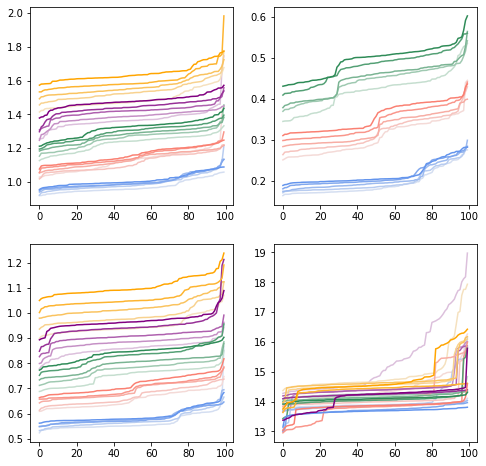

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
fig.set_size_inches(8,8)
orderedPlot(rch, ax1)
orderedPlot(rsv, ax2)
orderedPlot(sub, ax3)
orderedPlot(hru, ax4)

plt.show()

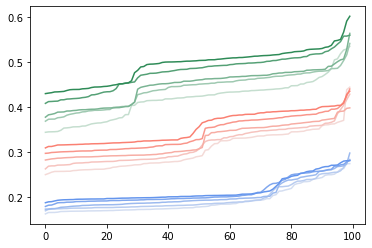

In [6]:
fig, ax = plt.subplots()
orderedPlot(rsv, ax)
plt.show()

In [7]:
def PullECDF(ext, col, palette, no, ax):
    b = ECDF(ext[col])
    if no == 4:
        ax.plot(b.x, b.y, label = col[-1], color = palette[no])
    else:
        ax.plot(b.x, b.y, color = palette[no])
    no += 1
    return no

def ecdfPlot(ext, ax):
    
    cmap_greens = sns.light_palette("seagreen", as_cmap=True)
    cmap_blues = sns.light_palette("cornflowerblue", as_cmap=True)
    cmap_reds = sns.light_palette("salmon", as_cmap = True)
    cmap_purples = sns.light_palette("purple", as_cmap=True)
    cmap_oranges = sns.light_palette("orange", as_cmap=True)
    
    
    greens = cmap_greens(np.linspace(0.2,1,5))
    blues = cmap_blues(np.linspace(0.2,1,5))
    reds = cmap_reds(np.linspace(0.2,1,5))
    purples = cmap_purples(np.linspace(0.2,1,5))
    oranges = cmap_oranges(np.linspace(0.2,1,5))
    g = 0
    bl = 0
    r = 0
    p = 0
    o = 0
    
    for col in ext.columns:
        if "I1" in col:
            bl = PullECDF(ext, col, blues, bl, ax)
        elif "I2" in col:
            r = PullECDF(ext, col, reds, r, ax)
        elif "I3" in col:
            g = PullECDF(ext, col, greens, g, ax)

        elif "I4" in col:
            p = PullECDF(ext, col, purples, p, ax)

        elif "I5" in col:
            o = PullECDF(ext, col, oranges, o, ax)




ecdfPlot(rch, ax1)

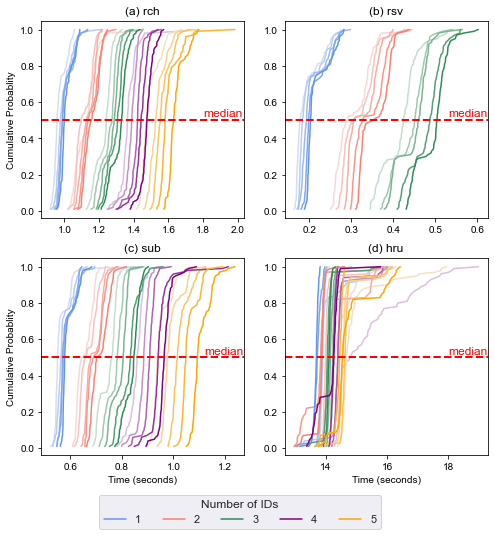

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
sns.set_theme()
fig.set_size_inches(8,8)
ecdfPlot(rch, ax1)
ecdfPlot(rsv, ax2)
ecdfPlot(sub, ax3)
ecdfPlot(hru, ax4)
plt.legend(title = "Number of IDs", ncol=5, bbox_to_anchor=(0.5, -0.17))
for ax in [ax1,ax3]:
    ax.set_ylabel("Cumulative Probablity")
for ax in [ax3, ax4]:
    ax.set_xlabel("Time (seconds)")
for ax in [ax1, ax2, ax3, ax4]:
    ax.axhline(0.5, color ="red", linestyle="dashed", lw=2)



ax1.text(1.8, 0.52, "median", color ="red")
ax2.text(0.53, 0.52, "median", color ="red")
ax3.text(1.12, 0.52, "median", color ="red")
ax4.text(18, 0.52, "median", color ="red")

ax1.set_title("(a) rch")
ax2.set_title("(b) rsv")
ax3.set_title("(c) sub")
ax4.set_title("(d) hru")

plt.savefig("../Figures/ECDFs.png")
plt.show()

In [9]:

cmap_greens = sns.light_palette("seagreen", as_cmap=True)
cmap_blues = sns.light_palette("cornflowerblue", as_cmap=True)
cmap_reds = sns.light_palette("salmon", as_cmap = True)
cmap_purples = sns.light_palette("purple", as_cmap=True)
cmap_oranges = sns.light_palette("orange", as_cmap=True)
greens = cmap_greens(np.linspace(0.2,1,5))
blues = cmap_blues(np.linspace(0.2,1,5))
reds = cmap_reds(np.linspace(0.2,1,5))
purples = cmap_purples(np.linspace(0.2,1,5))
oranges = cmap_oranges(np.linspace(0.2,1,5))

def boxplotTimes(df, ymin, ymax, ext,fname):
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
    fig.set_size_inches(15,5)
    plt.suptitle(ext)
    sns.boxplot(data=df.iloc[:,::5], ax=ax1, palette=blues)
    sns.boxplot(data=df.iloc[:,1::5],ax=ax2, palette=reds)
    sns.boxplot(data=df.iloc[:,2::5],ax=ax3, palette=greens)
    sns.boxplot(data=df.iloc[:,3::5],ax=ax4, palette=purples)
    sns.boxplot(data=df.iloc[:,4::5],ax=ax5, palette=oranges)


    ax_ls = [ax1, ax2, ax3, ax4, ax5]
    for ax in ax_ls:
        ax.set_ylim(ymin, ymax)
        ax.set_xticklabels([1,2,3,4,5])
        ax.set_xlabel("Number of Variables")

    i = 1
    for ax in ax_ls:
        if i ==1:
            ax.set_title("%s ID" % i)
            i+=1
        else:
            ax.set_title("%s IDs" % i)
            i+=1

    ax1.set_ylabel("Time (seconds)")
    plt.savefig(fname)
    plt.show()

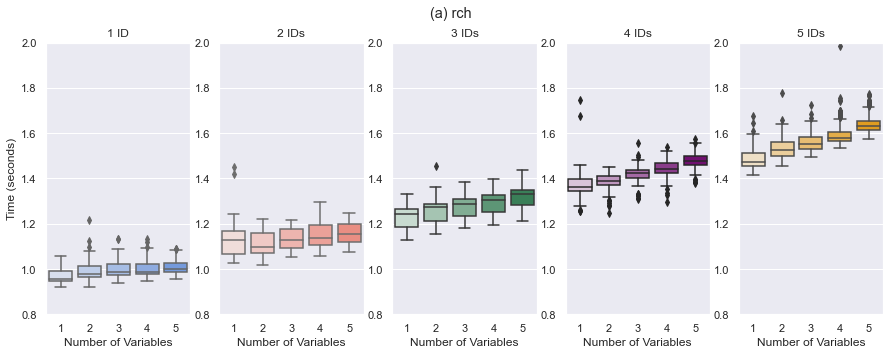

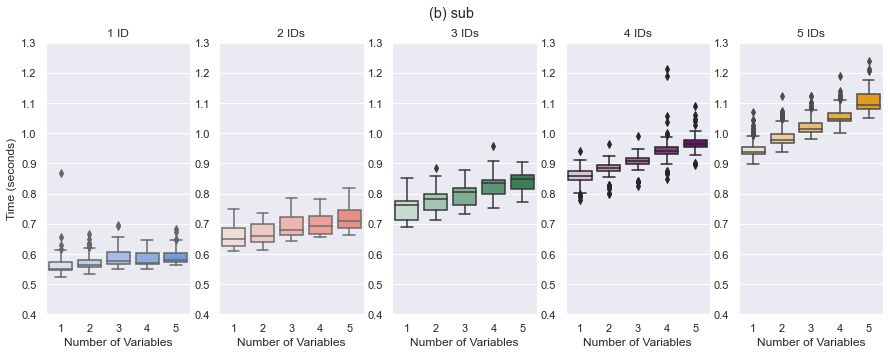

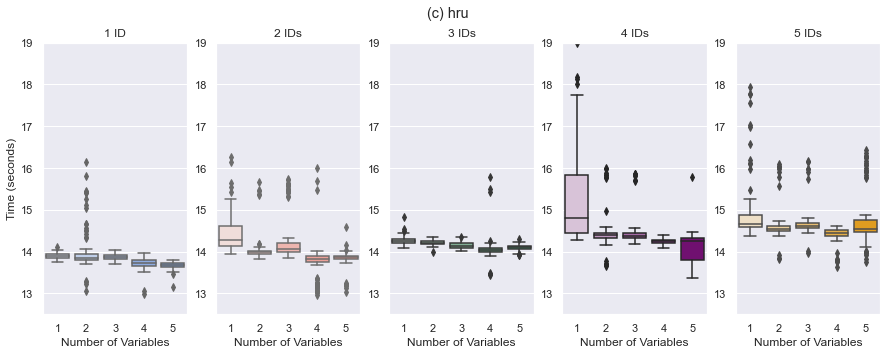

In [11]:
boxplotTimes(rch, 0.8, 2, '(a) rch', '../Figures/ReachBoxplot.png')
boxplotTimes(sub, 0.4, 1.3, '(b) sub', '../Figures/SubbasinBoxplot.png')
boxplotTimes(hru, 12.5, 19, '(c) hru', '../Figures/HRUBoxplot.png')

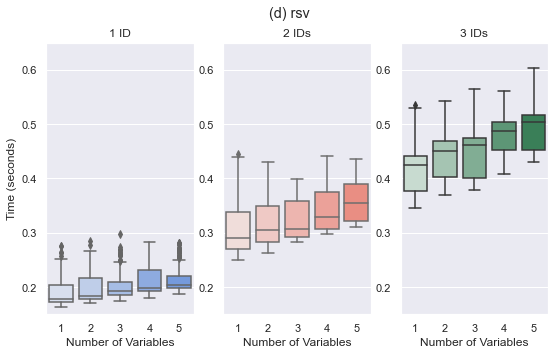

In [12]:
fig, (ax2, ax3, ax4) = plt.subplots(1,3)
fig.set_size_inches(9,5)
plt.suptitle("(d) rsv")
sns.boxplot(data=rsv.iloc[:,::3], ax=ax2, palette=blues)
sns.boxplot(data=rsv.iloc[:,1::3],ax=ax3, palette=reds)
sns.boxplot(data=rsv.iloc[:,2::3],ax=ax4, palette=greens)



ax_ls = [ax2, ax3, ax4]
for ax in ax_ls:
    ax.set_ylim(0.15, 0.65)
    ax.set_xticklabels([1,2,3,4,5])

    ax.set_xlabel("Number of Variables")
    
    #ax.tick_params(axis="y", pad = -5)

i = 1
for ax in ax_ls:
    if i ==1:
        ax.set_title("%s ID" % i)
        i+=1
    else:
        ax.set_title("%s IDs" % i)
        i+=1

ax2.set_ylabel("Time (seconds)")
plt.savefig("../Figures/ReservoirBoxplot.png")
plt.show()

Look at the spread from 1 ID to 5 IDs:

In [15]:
I1 = rch.iloc[:,::5].median()
I1.max() - I1.min()

0.041665600000669656

In [16]:
I1 = rch.iloc[:,4::5].median()
I1.max() - I1.min()

0.15709195000090403

Now look at all variables/IDs extracted from output:

In [28]:
def readDataAll(ext):
    files = [f for f in os.listdir(ext)]
    df = pd.DataFrame()
    
    for f in files:
        if "All" in f:
            i = pd.read_csv(os.path.join(ext, f))
            df[f[:-4]] = i['time']
    
    df_mean = df.mean()
    df_std = df.std()
    return df, df_mean, df_std

In [36]:
rch_all, rch_all_mean, rch_all_std = readDataAll('rch')
sub_all, sub_all_mean, sub_all_std = readDataAll('sub')
hru_all, hru_all_mean, hru_all_std = readDataAll('hru')
rsv_all, rsv_all_mean, rsv_all_std = readDataAll('rsv')

In [37]:
rch_all_mean

AllVariablesIDs          14.695351
AllVariablesIDs_toCSV    33.961650
dtype: float64

In [38]:
sub_all_mean

AllVariablesIDs           9.317556
AllVariablesIDs_toCSV   -21.441550
dtype: float64

In [40]:
hru_all_mean # memory error

Series([], dtype: float64)

In [46]:
rsv_all_mean

AllVariablesIDs          97.040052
AllVariablesIDs_toCSV     3.258526
dtype: float64

In [47]:
rsv_noOutlier = rsv_all[rsv_all['AllVariablesIDs'] < 900]

In [48]:
rsv_noOutlier.mean()

AllVariablesIDs          1.537788
AllVariablesIDs_toCSV    3.255902
dtype: float64